In [1]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("Lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\User\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

122128    100000.0
520473     67500.0
144532     65000.0
168214     90000.0
141204     90000.0
618722     65000.0
175140    100000.0
715515     70469.5
36052     130000.0
292377    135000.0
Name: salary_year_avg, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d51cfd5490>,
 'caps': [<matplotlib.lines.Line2D at 0x1d51cfd6850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d51cfd4b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1d51cfd7c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d51cfd8650>],
 'means': []}

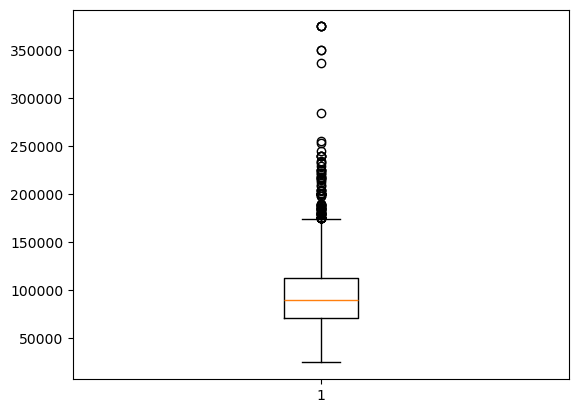

In [6]:
plt.boxplot(df_DA_US['salary_year_avg'])

<Axes: >

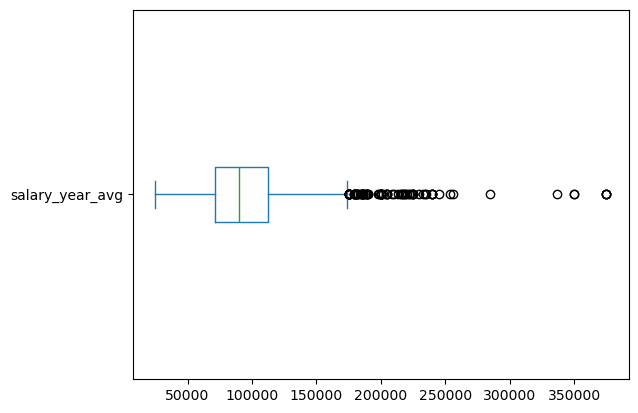

In [7]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\User\AppData\Local\Temp\ipykernel_13428\931824037.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


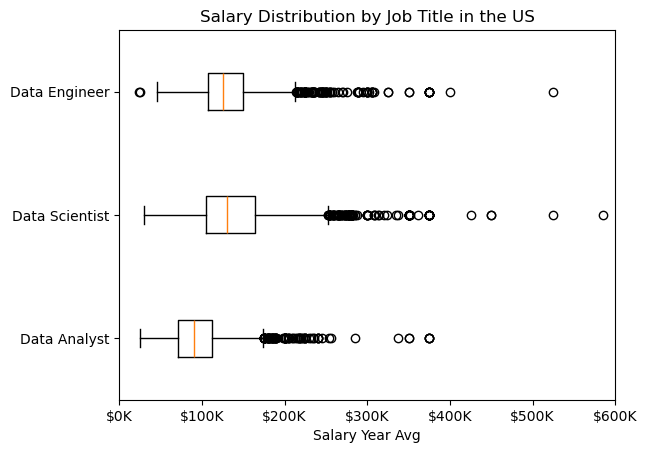

In [18]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
 
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
job_list = [df_US[df_US['job_title_short'] == title]['salary_year_avg'] for title in job_titles]

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list =  [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution by Job Title in the US')
plt.xlabel('Salary Year Avg')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K' ))
plt.xlim(0, 600000)
plt.show()

In [14]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64